In [ ]:
# Imports
import tensorflow as tf
print(tf.__version__)
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import os 
import pathlib 
import random
from IPython.display import Image
from skimage import color
from skimage import io

2.9.2


# Data Collection

In [ ]:
# Import data from GitHub
!git clone https://github.com/gt-big-data/cancer-detection.git
!ls

fatal: destination path 'cancer-detection' already exists and is not an empty directory.
cancer-detection  sample_data


In [ ]:
# General directory & Cancer Images Array
rootdir = "/content/cancer-detection/Dataset_BUSI_with_GT"
cancerImages = []
labels = []

# Going through each file
for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    # The actual path of each file
    full_path = os.path.join(subdir, file)
    # If the file suffix has .png, showing all non-mask images
    if ").png" in full_path:
      # Converting all the images to 1-D arrays all held by the following 2-D Array
      img = io.imread(full_path)
      imgGray = color.rgb2gray(img)
      # print(imgGray.shape)
      cancerImages.append(imgGray)
      
      # adding category label for each image, should be matched with cancerImages order
      name = file.split(' ')[0]
      # 0 = benign, 1 = malignant, 2 = normal
      if name == "benign":
        labels.append(0)
      elif name == "malignant":
        labels.append(1)
      elif name == "normal":
        labels.append(2)


      # print(full_path)
      # Displays each image in grayscale
      ## io.imshow(imgGray)
      plt.show()

# Data Preprocessing

In [ ]:
maxRows = 0
maxCols = 0
minRows = np.Inf
minCols = np.Inf
for i in range(len(cancerImages)):
  # print("HELLO", cancerImages[i].shape)
  # print("shape", cancerImages[i].shape[1])
  # print("bye", len(cancerImages[i]))
  if cancerImages[i].shape[0] > maxRows:
    maxRows = cancerImages[i].shape[0]
  if cancerImages[i].shape[1] > maxCols: 
    maxCols = cancerImages[i].shape[1]

  if cancerImages[i].shape[0] < minRows:
    minRows = cancerImages[i].shape[0]
  if cancerImages[i].shape[1] < minCols:
    minCols = cancerImages[i].shape[1]
  # print("hi", cancerImages[i][maxCols].shape)

print("max size of Row: " + str(maxRows))
# print("# of Pixels in Row: " + str(len(cancerImages[maxRows])))
print("max size of Column: " + str(maxCols))
print("min size of Row: " + str(minRows))
print("min size of Column: " + str(minCols))

# print("# of Pixels in Column: " + str(len(cancerImages[maxCols])))

# Convert array to tensors
numpyCancerImages = np.asarray(cancerImages)
b = []
print(type(numpyCancerImages))
for i in range(len(numpyCancerImages)):
  b.append(cv2.resize(numpyCancerImages[i].astype('float'), ( maxCols, maxRows ), interpolation = cv2.INTER_LINEAR))
print(b[1].shape)
print(b[1])

max size of Row: 719
max size of Column: 1048
min size of Row: 310
min size of Column: 190
<class 'numpy.ndarray'>


<ipython-input-4-55a378c17c5a>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  numpyCancerImages = np.asarray(cancerImages)


(719, 1048)
[[0.00784314 0.02440129 0.0550479  ... 0.68942149 0.68737839 0.68627451]
 [0.00418882 0.01354644 0.03086597 ... 0.69490296 0.69285986 0.69175598]
 [0.06549401 0.04864723 0.0174664  ... 0.70204796 0.70000486 0.69890098]
 ...
 [0.10631323 0.10631323 0.10631323 ... 0.13996893 0.14019342 0.14031471]
 [0.09959912 0.09959912 0.09959912 ... 0.12483486 0.12592603 0.12651559]
 [0.09411765 0.09411765 0.09411765 ... 0.11057851 0.11262161 0.11372549]]


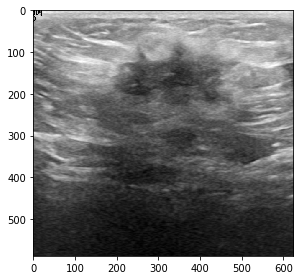

In [ ]:
io.imshow(numpyCancerImages[6])


780
(719, 1048, 1)


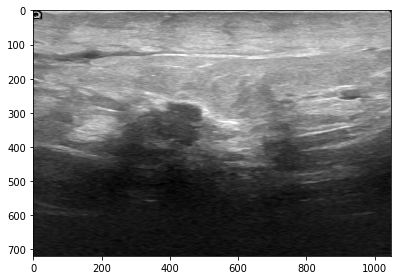

In [ ]:
io.imshow(b[5])
print(len(b))
for i in range(len(b)):
  b[i] = np.reshape(b[i], (*b[i].shape, 1))
print (b[0].shape)

In [ ]:
b=b[:350]
labels=labels[:350]

# Deep Learning

Here, we want to take a deep learning approach. We will implement a Convolutional Neural Network since we are dealing with image-related data.

## Model

In [ ]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  # layers.Rescaling(1./255, input_shape=(maxCols, maxRows, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

In [ ]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

In [ ]:
epochs = 10
b=np.stack(b, axis=0)
labels = np.array(labels)
history = model.fit(x=b,
                    y=labels,
                    epochs=epochs,
                    batch_size=32)


Epoch 1/10
11/11 [==============================] - 5s 430ms/step - loss: 0.6580 - accuracy: 0.5657
Epoch 2/10
11/11 [==============================] - 5s 435ms/step - loss: 0.5385 - accuracy: 0.7257
Epoch 3/10
11/11 [==============================] - 5s 439ms/step - loss: 0.4231 - accuracy: 0.8143
Epoch 4/10
11/11 [==============================] - 5s 440ms/step - loss: 0.3942 - accuracy: 0.8343
Epoch 5/10
11/11 [==============================] - 5s 442ms/step - loss: 0.2624 - accuracy: 0.9029
Epoch 6/10
11/11 [==============================] - 5s 442ms/step - loss: 0.2429 - accuracy: 0.8971
Epoch 7/10
11/11 [==============================] - 5s 438ms/step - loss: 0.1448 - accuracy: 0.9486
Epoch 8/10
11/11 [==============================] - 5s 437ms/step - loss: 0.1072 - accuracy: 0.9629
Epoch 9/10
11/11 [==============================] - 5s 436ms/step - loss: 0.1024 - accuracy: 0.9743
Epoch 10/10
11/11 [==============================] - 5s 433ms/step - loss: 0.0331 - accuracy: 0.9943

## Prediction